In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(365)
print(last_date)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, 
                       Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
year_ago_df = pd.DataFrame(precip, columns=['date','precp'])
year_ago_df.set_index(year_ago_df['date'],inplace=True)

# Sort the dataframe by date
year_ago_df = year_ago_df.sort_index()
year_ago_df.head()

2017-08-23
2016-08-23


,date,precp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


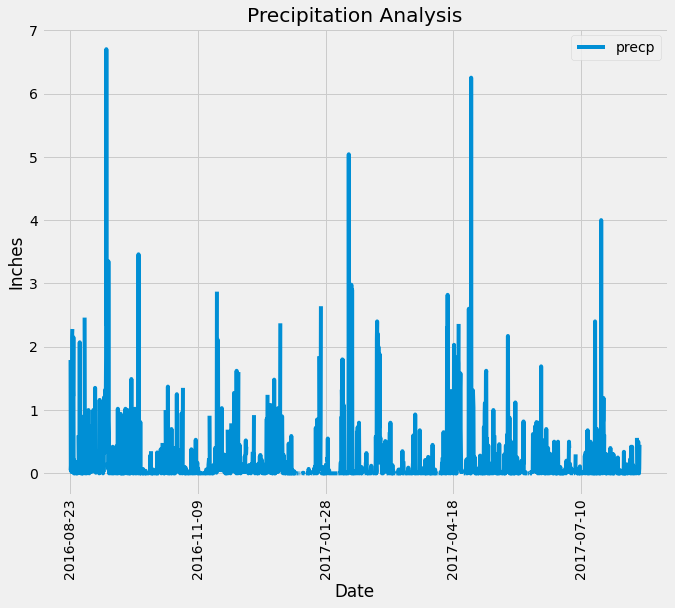

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
year_ago_df.plot(title="Precipitation Analysis")
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()
fig.savefig("Precipitation Analysis.png", bbox_inches='tight')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_ago_df.describe()

,precp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
station_df = pd.read_sql("select * from Station",conn)
station_df["station"].count()

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurement_df = pd.read_sql("select * from Measurement",conn)
measurement_df["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
m_min = measurement_df["tobs"].loc[measurement_df["station"]=="USC00519281"].min()
m_max = measurement_df["tobs"].loc[measurement_df["station"]=="USC00519281"].max()
m_avg = measurement_df["tobs"].loc[measurement_df["station"]=="USC00519281"].mean()
station_data = {
    "Min" : [m_min],
    "Max" : [m_max],
    "Mean" : [m_avg]}
most_active = pd.DataFrame(data=station_data)
most_active

,Min,Max,Mean
0,54.0,85.0,71.663781


In [16]:
# Choose the station with the highest number of temperature observations.
temps = pd.read_sql("select station,tobs from Measurement",conn)
temp_station = temps.groupby("station").count()["tobs"]
observation = pd.DataFrame(temp_station)
observation

,tobs
station,
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


In [17]:
# Query the last 12 months of temperature observation data for this station
high_station = pd.read_sql("select date,tobs from Measurement where station = 'USC00519281' \
and date between '2016-08-23' and '2017-08-23'",conn)
high_station.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


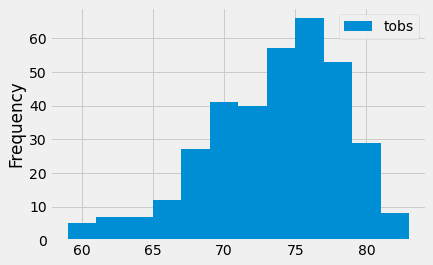

In [18]:
# Plot the results as a histogram
high_station.plot.hist(bins=12)
plt.show()